In [1]:
import pandas as  pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import tensorflow as tf
import pandas as pd;
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import RNN, SimpleRNN
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.layers.core import Activation
from keras.callbacks import LambdaCallback
from sklearn.preprocessing import MinMaxScaler

c:\Users\ved14\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot:xlabel='DATE'>

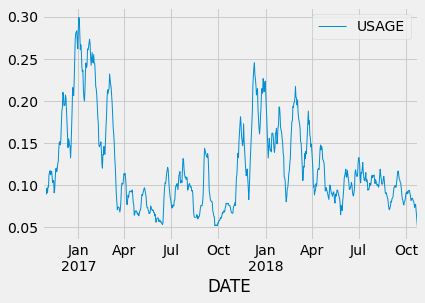

In [2]:
df=pd.read_csv("housold energy data.csv")
daily_usage=df.groupby('DATE').mean().dropna(axis=1)
temp=pd.to_datetime(daily_usage.index)
daily_usage.index=temp
daily_usage.index = pd.to_datetime(daily_usage.index)
daily_usage=daily_usage.sort_index()
daily_usage.rolling(10).mean().plot(linewidth=1)

In [3]:
daily_usage=pd.read_csv('data/portfolio_data.csv')
daily_usage['AMZN']=MinMaxScaler().fit_transform(np.array(daily_usage['AMZN']).reshape(-1,1))

In [4]:
daily_usage['AMZN']

0       0.000000
1       0.002412
2       0.005482
3       0.004181
4       0.005303
          ...   
1515    0.932037
1516    0.922045
1517    0.916523
1518    0.878953
1519    0.888689
Name: AMZN, Length: 1520, dtype: float64

In [5]:
train_data=np.array(daily_usage['AMZN'].iloc[:900])
test_data=np.array(daily_usage['AMZN'].iloc[900:])

def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y
 
time_steps = 10
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

In [6]:
trainX.shape

(89, 10, 1)

In [7]:
testX.shape

(61, 10, 1)

In [8]:
testY.shape

(61,)

In [9]:
trainY

array([0.01023291, 0.01038363, 0.01538565, 0.01636818, 0.03311598,
       0.03560583, 0.0273715 , 0.02332411, 0.02873922, 0.03531552,
       0.03450047, 0.04366152, 0.06169331, 0.06584677, 0.07616342,
       0.07783261, 0.08359386, 0.08238243, 0.0616654 , 0.06091734,
       0.06227391, 0.07079296, 0.04920504, 0.03778304, 0.02911326,
       0.03149146, 0.03457305, 0.04855188, 0.04421978, 0.04448775,
       0.06162073, 0.03529321, 0.04727346, 0.05479323, 0.04638583,
       0.04159595, 0.0309332 , 0.03194922, 0.04443192, 0.04341588,
       0.03228977, 0.03465119, 0.02514403, 0.03547743, 0.07198206,
       0.07365125, 0.06830311, 0.06829195, 0.07487941, 0.10625363,
       0.10306597, 0.09894601, 0.0989516 , 0.1104015 , 0.10130745,
       0.13400473, 0.16121433, 0.15893104, 0.14644276, 0.16225269,
       0.15212026, 0.17541088, 0.21120092, 0.23300097, 0.23727726,
       0.21879328, 0.23836029, 0.20636641, 0.18708408, 0.1352385 ,
       0.17134118, 0.17345138, 0.1868608 , 0.19336451, 0.20782

In [10]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, 
                        input_shape=input_shape, 
                        activation=activation[0]))
    model.add(Dense(units=dense_units, 
                    activation=activation[1]))
    model.compile(loss='mean_squared_error', 
                  optimizer='adam')
    return model


In [11]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model = create_RNN(hidden_units=14, 
                   dense_units=1, 
                   input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh']
                   )
history=model.fit(trainX, 
                  trainY,
                  batch_size=15, 
                  validation_data=[testX,testY],
                  epochs=500, 
                  verbose=2,
                  callbacks=[callback])

Epoch 1/500
6/6 - 1s - loss: 0.0060 - val_loss: 0.0266 - 1s/epoch - 204ms/step
Epoch 2/500
6/6 - 0s - loss: 0.0014 - val_loss: 0.0411 - 48ms/epoch - 8ms/step
Epoch 3/500
6/6 - 0s - loss: 0.0014 - val_loss: 0.0423 - 46ms/epoch - 8ms/step
Epoch 4/500
6/6 - 0s - loss: 2.2567e-04 - val_loss: 0.0396 - 46ms/epoch - 8ms/step


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 14)                224       
                                                                 
 dense (Dense)               (None, 1)                 15        
                                                                 
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________


In [13]:
predictions=model.predict(testX).flatten()

2/2 [==============================] - 0s 3ms/step


In [14]:
predictions

array([0.2878812 , 0.29289377, 0.2933895 , 0.31355596, 0.31987   ,
       0.33028185, 0.33105895, 0.3326753 , 0.3498766 , 0.34758353,
       0.36770797, 0.37244776, 0.38898543, 0.3714539 , 0.38328943,
       0.39161164, 0.40417325, 0.37938324, 0.36876926, 0.37579086,
       0.37181553, 0.3802323 , 0.38485053, 0.41693467, 0.4295725 ,
       0.43082085, 0.44084054, 0.44481716, 0.4770476 , 0.49962002,
       0.5075017 , 0.513643  , 0.5260392 , 0.49232712, 0.4992443 ,
       0.51560026, 0.5324815 , 0.533103  , 0.5454337 , 0.54442173,
       0.55317825, 0.5655555 , 0.5652503 , 0.5728188 , 0.580419  ,
       0.5697894 , 0.5776141 , 0.5492706 , 0.5077998 , 0.53139263,
       0.5402958 , 0.5265585 , 0.50939506, 0.5428414 , 0.5384123 ,
       0.53169584, 0.53901345, 0.54352176, 0.56159073, 0.56317824,
       0.5727859 ], dtype=float32)

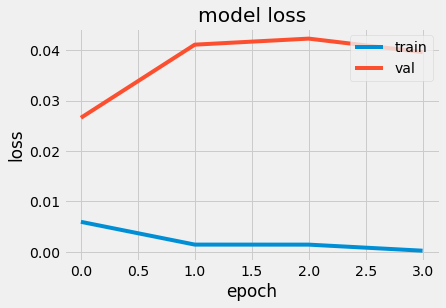

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()



TypeError: unhashable type: 'numpy.ndarray'

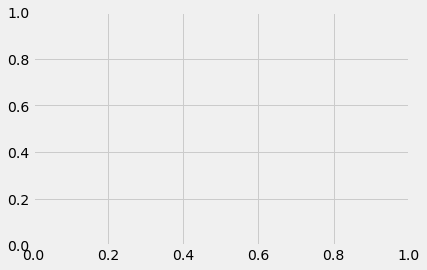

In [19]:
test_val=np.array(daily_usage[900:].iloc[range(0,len(daily_usage)-900,time_steps)])
plt.plot(range(0,len(daily_usage)-900,time_steps),test_val)
plt.plot(predictions)
plt.title('Forecast Evaluation')
plt.show()

In [18]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_true=test_val[:len(predictions)],y_pred=predictions)
m1=test_val.mean()
m2=predictions.mean()
print('Peercentage error'," ",(mae/(m1+m2))*100, "%")

ValueError: could not convert string to float: '11/23/2016'

In [ ]:
def SMAPE(y_true, y_pred):
        ans = 0
        for i in range(len(y_true)):
            num = np.abs(y_true[i] - y_pred[i])
            denom = (np.abs(y_true[i]) + np.abs(y_pred[i]))/2
            ans = ans + np.sum((np.divide(num,denom)))
            return (100/(len(y_true)*len(y_true[0])))*ans 

In [ ]:
SMAPE(y_true=test_val[:len(predictions)],y_pred=predictions)

In [ ]:
len(predictions)